<h2> Import Libraries</h2>

In [1]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

<h2> Get the data </h2>

In [2]:
path=r"G:\challenge2_dataset.txt"
df=pd.read_csv(path)
df.head()

,1,2,3,Target
0,0.60,0.31,13.0,False
1,0.74,0.33,21.0,False
2,0.54,0.19,NaN,True
3,0.46,NaN,9.0,False
4,0.77,0.15,15.0,True


In [3]:
df.isnull() 

,1,2,3,Target
0,False,False,False,False
1,False,False,False,False
2,False,False,True,False
3,False,True,False,False
4,False,False,False,False
...,...,...,...,...
1990,False,False,False,False
1991,False,False,False,False
1992,False,False,False,False
1993,False,False,False,False


In [4]:
df.shape

(1995, 4)

In [5]:
# It seems that there are Nan(Not a number) Values. As they are not in great number, we will just drop them.
df.dropna(inplace=True) 
df

,1,2,3,Target
0,0.60,0.31,13.0,False
1,0.74,0.33,21.0,False
4,0.77,0.15,15.0,True
5,0.46,0.17,18.0,False
6,0.49,0.26,10.0,False
...,...,...,...,...
1990,0.80,0.30,22.0,False
1991,0.69,0.22,9.0,True
1992,0.66,0.24,15.0,False
1993,0.46,0.26,11.0,False


<h2> Standardize the Variables</h2>




In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
scaler.fit(df.drop('Target',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaled_features = scaler.transform(df.drop('Target',axis=1))


In [9]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,1,2,3
0,-0.040305,-0.024599,-0.078238
1,-0.034006,-0.024258,0.109705
2,-0.032656,-0.027327,-0.031253
3,-0.046605,-0.026986,0.039226
4,-0.045255,-0.025452,-0.148717


<h2> Pair Plot </h2>

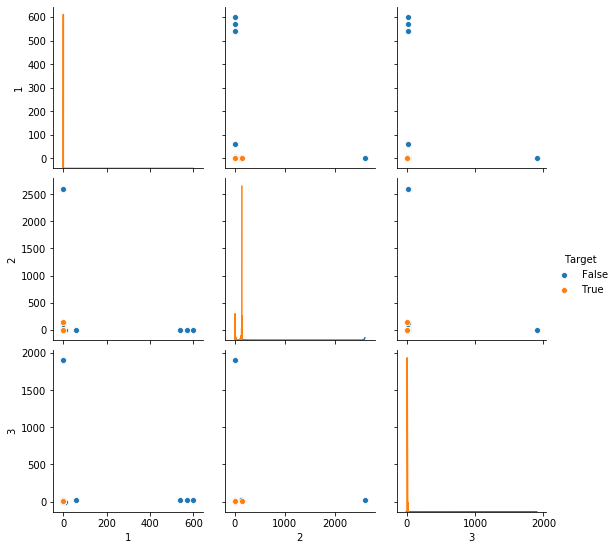

In [10]:
import seaborn as sns

sns.pairplot(df,hue='Target')

<h2> Train Test Split </h2>

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Here , I have converted True's to 1 and False's to 0
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Target'].astype(int),
                                                    test_size=0.30)

In [13]:
df['Target'].astype(int)

0       0
1       0
4       1
5       0
6       0
       ..
1990    0
1991    1
1992    0
1993    0
1994    0
Name: Target, Length: 1977, dtype: int32

<h2> Using KNN </h2>

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [16]:
pred=knn.predict(X_test)

In [17]:
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,

<h2> Predictions and Evaluations</h2>
<h5> Let's evaluate our KNN model! </h5>

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [19]:
print(confusion_matrix(y_test,pred))

[[476   7]
 [ 10 101]]


<h2> Choosing a K Value </h2>

In [20]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['Target'].astype(int),cv=10)
    accuracy_rate.append(score.mean())

In [21]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['Target'].astype(int),cv=10)
    error_rate.append(1-score.mean())

In [22]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

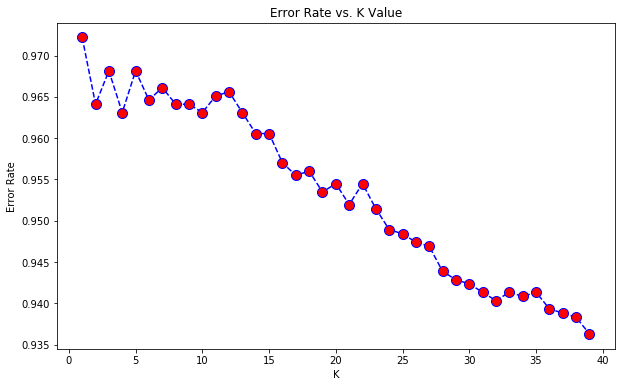

In [23]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

<h6>In the above plot we can see that, the accuracy when k is 1, tends to be 97% accurate. But after that, the accuracy decreases, so we will take k=1 </h6>

In [24]:
#Evaluation Report
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[476   7]
 [ 10 101]]


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       483
           1       0.94      0.91      0.92       111

    accuracy                           0.97       594
   macro avg       0.96      0.95      0.95       594
weighted avg       0.97      0.97      0.97       594



<h2> Importing the Prediction_csv Data Set </h2>

In [26]:
df2=pd.read_csv(r"G:\challenge2_prediction.txt")
df2.head()

,1,2,3
0,0.74,0.21,22.0
1,0.43,0.15,14.0
2,0.77,0.10,15.0
3,0.57,0.31,15.0
4,0.80,0.31,20.0


In [27]:
df2.shape

(855, 3)

In [28]:
df2.dropna(inplace=True) 

In [29]:
scaled_features2 = scaler.transform(df2)

In [30]:
scaled_features2.shape

(844, 3)

In [31]:
scaled_features2

array([[-0.03400591, -0.02630391,  0.13319779],
       [-0.04795473, -0.0273267 , -0.05474549],
       [-0.03265603, -0.02817903, -0.03125258],
       ...,
       [-0.04525496, -0.02545159,  0.01573324],
       [-0.03895549, -0.02459926, -0.05474549],
       [-0.03130614, -0.02630391, -0.00775967]])

In [32]:
pred2=knn.predict(scaled_features2)

In [33]:
pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,

<h5>Here, I am Adding the predicted target column to the challenge2_prediction.csv file with the column header "Target" </h5>

In [34]:
add_column=pd.DataFrame(pred2,columns=["target"])

In [35]:
add_column

,target
0,0
1,0
2,0
3,0
4,0
...,...
839,0
840,0
841,0
842,0


In [37]:
final_df=pd.concat([df2,add_column],axis=1)

In [42]:
final_df.dropna(inplace=True)

In [43]:
final_df.astype(int)

,1,2,3,target
0,0,0,22,0
1,0,0,14,0
2,0,0,15,0
3,0,0,15,0
4,0,0,20,0
...,...,...,...,...
837,0,0,21,1
839,0,0,12,0
841,0,0,20,0
842,0,0,0,0


<h3>As you can see, I have Added the predicted target column to the challenge2_prediction.csv file with the column header "Target" ! </h3>